## Topic Modelling

In [1]:
import pandas as pd
import nltk; nltk.download('stopwords')

import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
# import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
#warnings.filterwarnings("ignore",category=DeprecationWarning)

[nltk_data] Downloading package stopwords to C:\Users\Patrisha
[nltk_data]     Estrada\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Patrisha Estrada\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
C:\Users\Patrisha Estrada\anaconda3\lib\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#depreca

### 1. Import data

In [2]:
df = pd.read_csv('combined.csv')

C:\Users\Patrisha Estrada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### a. Drop irrelevant columns.

In [3]:
df.drop(columns=['Unnamed: 0','Unnamed: 0.1'], inplace=True)
df.head()

C:\Users\Patrisha Estrada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,skills,title,company
0,skills data science data scientist python\n...,Data Scientist,Ing Business Shared Services B.
1,skills data science data scientist python\n...,Tableau Data Scientist,Information Professionals Inc
2,skills data science data scientist python\n...,Data Scientist Engineer,Sysgen RPO Inc
3,skills data science data scientist python\n...,"Analysts – Technology, Data Science, Engineeri...",Ing Business Shared Services B.
4,skills data science data scientist python\n...,Data Analyst / Scientist - Temporary WFH,Sysgen RPO Inc


In [4]:
df.shape

C:\Users\Patrisha Estrada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(3215, 3)

In [5]:
pprint(df.iloc[0,1])

'Data Scientist'


C:\Users\Patrisha Estrada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 2. Pre-process Data

In [6]:
# Convert to list
data = df.skills.values.tolist()
len(data)

C:\Users\Patrisha Estrada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3215

#### a. Prepare stopwords

In [7]:
nlp = spacy.load('en_core_web_lg')

C:\Users\Patrisha Estrada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

stop_words.extend(["data",'business','candidate', 'experience', 'work', 'analysis','knowledge','tools','working','years','science','must','models','required','script','analytics','support','design','development','management','skills','degree','andor','reports','including','communication',\
       'related','information','requirements','team','performance','learning','ability','process','processes','technology','analyze','sales','risk','related','new','client','project','operations','written','quality','nan','technical','time','computer','field','based','insights',\
       'engineering','complex','strong','high','statistical','provide','financial','understanding','leadership','office','customer','employees','communicate','etc','clients','identify','develop','operational','possess','multiple','able','results','internal','stakeholders','ensure',\
       'systems','groups','bachelorscollege','company', 'partners','approach','model','end','ie','projects','intermediateexpert','relevant','key','benefits','global','familiarity','software','issues','advanced','resource','processing','maintain','datasets','meet','wellness','database',\
       'specific','test','sss','creating','compensation','big','trends','solutions','power','teams','large','quantitative','job','regular','assigned','use','sources','variable','tool','actionable','appropriate','metrics','output','finance','problem','home','system','good','understand',\
       'predictive','execution','campaign', 'planning','organization','bir','attention','documents','analyzing','improve','order','level','source','positions','problems','verbal','graduate','different','solving','requests','available','training','findings','implementation','account',\
       'platforms','help','improvement','implement','generate','ms','equivalentat','delivery','plans','existing','center','opportunities','external','accuracy','effectively','report','technologies','collaboration','accurate','excellent','closely','philhealth','pagibig','id','experienced'\
       'certificate','equivalentfulltime','computertelecommunication','scienceinformation','nurse','handson','payroll','implementations','understoodensure','prepare','takes','commission','ortigas','list','user','validate','profile','share','open'])

for stopword in stop_words:
    lexeme = nlp.vocab[stopword]
    lexeme.is_stop = True

C:\Users\Patrisha Estrada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### b. Tokenize words and Clean-up text

In [9]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))
data_words[0]

C:\Users\Patrisha Estrada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['skills',
 'data',
 'science',
 'data',
 'scientist',
 'python',
 'skills',
 'tableau',
 'developer',
 'etl',
 'bi',
 'tools',
 'skills',
 'etl',
 'sas',
 'python',
 'skills',
 'scripts',
 'core',
 'java',
 'scripts',
 'ja',
 'skills',
 'analyst',
 'data',
 'analysis',
 'data',
 'analytics',
 'skills',
 'data',
 'scientist',
 'data',
 'visualization',
 'skills',
 'data',
 'warehousing',
 'sql',
 'talend',
 'aws',
 'skills',
 'data',
 'architect',
 'data',
 'architecture',
 'skills',
 'etl',
 'python',
 'ruby',
 'java',
 'javascri',
 'skills',
 'data',
 'analyst',
 'data',
 'analysis',
 'data',
 'skills',
 'data',
 'analyst',
 'design',
 'tableau',
 'serve',
 'skills',
 'customer',
 'service',
 'data',
 'entry',
 'data',
 'skills',
 'data',
 'science',
 'skills',
 'etl',
 'developer',
 'sql',
 'plsql',
 'skills',
 'data',
 'process',
 'support',
 'customer',
 'servi',
 'skills',
 'civil',
 'registry',
 'associate',
 'data',
 'encod',
 'skills',
 'data',
 'architecture',
 'data',
 'arch

#### c. Creating Bigram and Trigram Models

In [10]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

C:\Users\Patrisha Estrada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['skills', 'data', 'science', 'data', 'scientist', 'python', 'skills', 'tableau', 'developer', 'etl', 'bi', 'tools', 'skills', 'etl', 'sas', 'python', 'skills', 'scripts', 'core', 'java', 'scripts', 'ja', 'skills', 'analyst', 'data', 'analysis', 'data', 'analytics', 'skills', 'data', 'scientist', 'data', 'visualization', 'skills', 'data', 'warehousing', 'sql', 'talend', 'aws', 'skills', 'data', 'architect', 'data', 'architecture', 'skills', 'etl', 'python', 'ruby', 'java', 'javascri', 'skills', 'data', 'analyst', 'data', 'analysis', 'data', 'skills', 'data', 'analyst', 'design', 'tableau', 'serve', 'skills', 'customer', 'service', 'data', 'entry', 'data', 'skills', 'data', 'science', 'skills', 'etl', 'developer', 'sql', 'plsql', 'skills', 'data', 'process', 'support', 'customer', 'servi', 'skills', 'civil', 'registry', 'associate', 'data', 'encod', 'skills', 'data', 'architecture', 'data', 'architect', 'sql', 'skills', 'azure', 'databricks', 'sql', 'stored', 'procedu', 'skills', 'azure

#### d. Remove Stopwords, Make Bigrams and Lemmatize

In [11]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        if 'nate' in texts_out:
            print(sent)
    return texts_out

C:\Users\Patrisha Estrada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
# nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ','VERB', 'ADV'])

print(data_lemmatized[:1])

C:\Users\Patrisha Estrada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['scientist', 'python', 'tableau', 'developer', 'sas', 'python', 'script', 'core', 'java', 'script', 'analyst', 'scientist', 'visualization', 'warehousing', 'sql', 'talend', 'aws', 'architect', 'architecture', 'etl', 'python', 'ruby', 'java', 'javascri', 'analyst', 'analyst', 'tableau', 'serve', 'service', 'entry', 'etl', 'developer', 'sql', 'plsql', 'servi', 'civil', 'registry', 'associate', 'encod', 'architecture', 'architect', 'sql', 'azure', 'sql', 'store', 'procedu', 'azure', 'datalake', 'en', 'excel', 'excel', 'macro', 'access', 'encoder', 'document', 'sql', 'azure', 'cisco', 'routing', 'id', 'engineer', 'python', 'sql', 'script', 'etl', 'visualization', 'master', 'mdm', 'personnel', 'ser', 'administrative', 'task', 'entry', 'da', 'sap', 'mdm', 'migration', 'developer', 'manager', 'master', 'mdm', 'sap', 'mdm', 'java', 'python', 'literate', 'acceptable', 'com', 'sigma', 'black', 'belt', 'gather', 'etl', 'talend', 'sap', 'mdm', 'migration', 'datastage', 'developer', 'engineerda',

#### e. Create the Dictionary and Corpus needed for Topic Modeling

In [13]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

C:\Users\Patrisha Estrada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(0, 1), (1, 6), (2, 1), (3, 1), (4, 1), (5, 2), (6, 3), (7, 1), (8, 4), (9, 6), (10, 1), (11, 2), (12, 2), (13, 4), (14, 1), (15, 2), (16, 2), (17, 9), (18, 1), (19, 1), (20, 2), (21, 5), (22, 2), (23, 20), (24, 5), (25, 1), (26, 1), (27, 1), (28, 7), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 1), (35, 1), (36, 3), (37, 98), (38, 1), (39, 2), (40, 12), (41, 2), (42, 9), (43, 1), (44, 1), (45, 1), (46, 1), (47, 2), (48, 1), (49, 19), (50, 1), (51, 2), (52, 4), (53, 1), (54, 1), (55, 1), (56, 2), (57, 8), (58, 2), (59, 1), (60, 14), (61, 7), (62, 1), (63, 2), (64, 2), (65, 1), (66, 8), (67, 2), (68, 2), (69, 3), (70, 2), (71, 1), (72, 10), (73, 2), (74, 3), (75, 1), (76, 5), (77, 1), (78, 1), (79, 1), (80, 21), (81, 3), (82, 9), (83, 1), (84, 1), (85, 21), (86, 2), (87, 5), (88, 6), (89, 3), (90, 5), (91, 5), (92, 1), (93, 2), (94, 1), (95, 6), (96, 1), (97, 3), (98, 1), (99, 2), (100, 2), (101, 1), (102, 3), (103, 1), (104, 1), (105, 1), (106, 2), (107, 1), (108, 1), (109, 1), 

In [14]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

C:\Users\Patrisha Estrada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[('ab', 1),
  ('abap', 6),
  ('abapworkflow', 1),
  ('acc', 1),
  ('acceptable', 1),
  ('access', 2),
  ('account', 3),
  ('accountancy', 1),
  ('accountant', 4),
  ('accounting', 6),
  ('acquisiti', 1),
  ('acquisition', 2),
  ('acrobat', 2),
  ('active', 4),
  ('ad', 1),
  ('adm', 2),
  ('admfa', 2),
  ('admin', 9),
  ('admini', 1),
  ('administ', 1),
  ('administra', 2),
  ('administration', 5),
  ('administrative', 2),
  ('administrator', 20),
  ('adobe', 5),
  ('adwo', 1),
  ('adword', 1),
  ('ag', 1),
  ('agile', 7),
  ('ai', 1),
  ('ailargescale', 1),
  ('airflow', 1),
  ('aks', 1),
  ('amazon', 2),
  ('ana', 1),
  ('anal', 1),
  ('analys', 3),
  ('analyst', 98),
  ('analytic', 1),
  ('analytical', 2),
  ('android', 12),
  ('angu', 2),
  ('angular', 9),
  ('angularjs', 1),
  ('ansibl', 1),
  ('antimalware', 1),
  ('ap', 1),
  ('apache', 2),
  ('apex', 1),
  ('api', 19),
  ('apis', 1),
  ('apo', 2),
  ('app', 4),
  ('appl', 1),
  ('applic', 1),
  ('applicat', 1),
  ('applicatio'

### 3. Build the Model

In [15]:
from gensim import models

lsimodel = models.LsiModel(corpus=corpus, num_topics=10, id2word=id2word)
lsimodel.show_topics(num_topics=10)

C:\Users\Patrisha Estrada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.461*"developer" + 0.393*"analyst" + 0.301*"sap" + 0.277*"engineer" + 0.265*"java" + 0.257*"sql" + 0.164*"net" + 0.144*"manager" + 0.124*"salesforce" + 0.120*"web"'),
 (1,
  '-0.299*"use" + -0.209*"product" + -0.171*"least" + -0.161*"modeling" + -0.157*"analytical" + -0.134*"portfolio" + -0.127*"statistic" + -0.119*"excel" + -0.118*"environment" + -0.117*"machine"'),
 (2,
  '0.231*"machine" + 0.202*"use" + 0.156*"visualization" + -0.137*"portfolio" + 0.131*"python" + -0.129*"product" + 0.122*"sql" + 0.117*"tableau" + -0.115*"vendor" + 0.113*"member"'),
 (3,
  '0.500*"marketing" + 0.171*"update" + 0.169*"evaluation" + 0.168*"resolve" + 0.166*"message" + 0.166*"teamswork" + 0.166*"kpis_forecast" + 0.166*"predict" + 0.166*"budgetsimprove" + 0.166*"solicit_feedback"'),
 (4,
  '0.364*"certificate" + 0.340*"member" + 0.295*"form" + 0.293*"tin" + -0.174*"machine" + 0.166*"reflect" + 0.166*"process" + 0.166*"statement" + 0.152*"use" + -0.144*"modeling"'),
 (5,
  '0.311*"use" + -0.251*

In [16]:
lsitopics = [[word for word, prob in topic] for topicid, topic in lsimodel.show_topics(formatted=False)]

C:\Users\Patrisha Estrada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
lsi_coherence = models.CoherenceModel(topics=lsitopics[:10],texts=texts,dictionary=id2word,window_size=10).get_coherence()

C:\Users\Patrisha Estrada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
lsi_coherence

C:\Users\Patrisha Estrada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.34162066185138806

### 3. Tune the Model

#### a. Optimal number of topics

C:\Users\Patrisha Estrada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


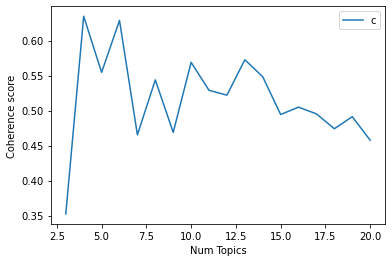

In [19]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of topic models
    coherence_values : Coherence values corresponding to the topic models with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print(num_topics)
        model = models.LsiModel(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

start1 = 3 
limit1 = 21
step1 = 1

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=start1, limit=limit1, step=step1)

x = range(start1, limit1, step1)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [20]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 3  has Coherence Value of 0.3525
Num Topics = 4  has Coherence Value of 0.6348
Num Topics = 5  has Coherence Value of 0.5546
Num Topics = 6  has Coherence Value of 0.6288
Num Topics = 7  has Coherence Value of 0.4654
Num Topics = 8  has Coherence Value of 0.5439
Num Topics = 9  has Coherence Value of 0.4689
Num Topics = 10  has Coherence Value of 0.5689
Num Topics = 11  has Coherence Value of 0.529
Num Topics = 12  has Coherence Value of 0.522
Num Topics = 13  has Coherence Value of 0.5726
Num Topics = 14  has Coherence Value of 0.5483
Num Topics = 15  has Coherence Value of 0.4945
Num Topics = 16  has Coherence Value of 0.5049
Num Topics = 17  has Coherence Value of 0.4954
Num Topics = 18  has Coherence Value of 0.4741
Num Topics = 19  has Coherence Value of 0.4914
Num Topics = 20  has Coherence Value of 0.4578


C:\Users\Patrisha Estrada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### b. Build optimal model

In [22]:
optimal_model = model_list[1] # Index of preferred number of topics

model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.461*"developer" + 0.393*"analyst" + 0.301*"sap" + 0.277*"engineer" + '
  '0.265*"java" + 0.257*"sql" + 0.164*"net" + 0.144*"manager" + '
  '0.124*"salesforce" + 0.120*"web"'),
 (1,
  '0.299*"use" + 0.209*"product" + 0.171*"least" + 0.161*"modeling" + '
  '0.157*"analytical" + 0.134*"portfolio" + 0.127*"statistic" + 0.119*"excel" '
  '+ 0.118*"environment" + 0.117*"machine"'),
 (2,
  '-0.231*"machine" + -0.202*"use" + -0.156*"visualization" + '
  '0.137*"portfolio" + -0.131*"python" + 0.129*"product" + -0.122*"sql" + '
  '-0.117*"tableau" + 0.115*"vendor" + -0.113*"member"'),
 (3,
  '0.500*"marketing" + 0.171*"update" + 0.169*"evaluation" + 0.168*"resolve" + '
  '0.166*"message" + 0.166*"budgetsimprove" + 0.166*"uploadmonitor" + '
  '0.166*"activitiesbuild" + 0.166*"kpis_forecast" + 0.166*"predict"')]


C:\Users\Patrisha Estrada\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
